In [1]:
# 데이터확보
# 전처리
# 모델정의  CNN
# 콜백(2개 다)
# 학습결과 시각화
# 저장된 모델 불러와서
# 평가하기

In [2]:
from tensorflow import keras

In [3]:
(x,y),(x_test,y_test) = keras.datasets.cifar10.load_data()
x = x / 255.0
x_test = x_test / 255.0

170498071/170498071 [==============================] - 4s 0us/step


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train,x_val,y_train,y_val = train_test_split(x,y,random_state=42)

In [6]:
x_train.shape

(37500, 32, 32, 3)

In [7]:
model = keras.Sequential([
  keras.layers.Conv2D(32,kernel_size=3,activation='relu',input_shape=(32, 32, 3)),
  keras.layers.MaxPool2D(),
  keras.layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(100,activation='relu'),
  keras.layers.Dense(10,activation='softmax')
])

In [8]:
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics='accuracy' )

In [9]:
modelCheckPoint = keras.callbacks.ModelCheckpoint('cifar10.h5',save_best_only=True)
earlyStopPoing = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=200,
          callbacks=[modelCheckPoint,earlyStopPoing])

Epoch 1/200
1172/1172 [==============================] - 17s 5ms/step - loss: 1.5351 - accuracy: 0.4554 - val_loss: 1.3603 - val_accuracy: 0.5238
Epoch 2/200
1172/1172 [==============================] - 6s 5ms/step - loss: 1.2570 - accuracy: 0.5586 - val_loss: 1.2772 - val_accuracy: 0.5527
Epoch 3/200
1172/1172 [==============================] - 6s 5ms/step - loss: 1.1401 - accuracy: 0.6004 - val_loss: 1.1718 - val_accuracy: 0.5924
Epoch 4/200
1172/1172 [==============================] - 5s 4ms/step - loss: 1.0514 - accuracy: 0.6299 - val_loss: 1.1135 - val_accuracy: 0.6082
Epoch 5/200
1172/1172 [==============================] - 6s 5ms/step - loss: 0.9800 - accuracy: 0.6569 - val_loss: 1.1127 - val_accuracy: 0.6102
Epoch 6/200
1172/1172 [==============================] - 5s 4ms/step - loss: 0.9242 - accuracy: 0.6775 - val_loss: 1.0806 - val_accuracy: 0.6275
Epoch 7/200
1172/1172 [==============================] - 5s 4ms/step - loss: 0.8681 - accuracy: 0.6950 - val_loss: 1.1091 - val_a

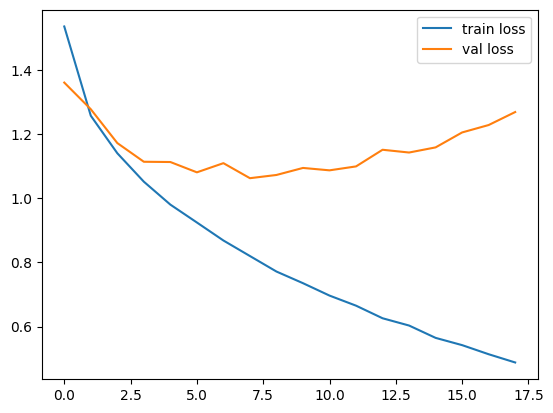

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.show()


In [10]:
model = keras.Sequential([
  keras.layers.Conv2D(64,kernel_size=3,activation='relu',input_shape=(32, 32, 3)),
  keras.layers.Conv2D(32,kernel_size=3,activation='relu'),
  keras.layers.MaxPool2D(),
  keras.layers.Dropout(0.25),
  keras.layers.Flatten(),
  keras.layers.Dense(100,activation='relu'),
  keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics='accuracy' )
modelCheckPoint = keras.callbacks.ModelCheckpoint('cifar10_2.h5',save_best_only=True)
earlyStopPoing = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history2 = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=200,
          callbacks=[modelCheckPoint,earlyStopPoing])

Epoch 1/200
1172/1172 [==============================] - 10s 7ms/step - loss: 1.4857 - accuracy: 0.4651 - val_loss: 1.2182 - val_accuracy: 0.5594
Epoch 2/200
1172/1172 [==============================] - 7s 6ms/step - loss: 1.1317 - accuracy: 0.6000 - val_loss: 1.1483 - val_accuracy: 0.5926
Epoch 3/200
1172/1172 [==============================] - 7s 6ms/step - loss: 0.9737 - accuracy: 0.6580 - val_loss: 1.0385 - val_accuracy: 0.6386
Epoch 4/200
1172/1172 [==============================] - 7s 6ms/step - loss: 0.8604 - accuracy: 0.6989 - val_loss: 0.9548 - val_accuracy: 0.6680
Epoch 5/200
1172/1172 [==============================] - 7s 6ms/step - loss: 0.7698 - accuracy: 0.7288 - val_loss: 0.9483 - val_accuracy: 0.6701
Epoch 6/200
1172/1172 [==============================] - 7s 6ms/step - loss: 0.6913 - accuracy: 0.7587 - val_loss: 0.9582 - val_accuracy: 0.6782
Epoch 7/200
1172/1172 [==============================] - 6s 5ms/step - loss: 0.6185 - accuracy: 0.7794 - val_loss: 0.9921 - val_a

In [11]:
import matplotlib.pyplot as plt

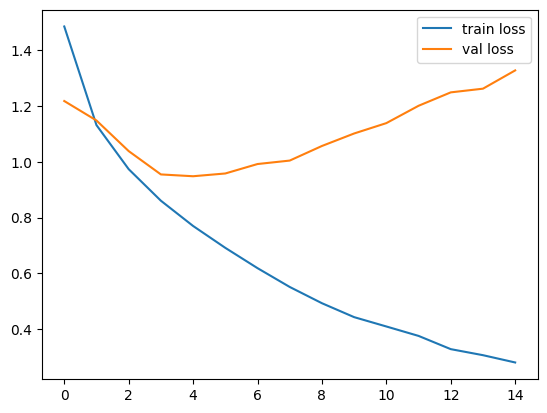

In [12]:
plt.plot(history2.history['loss'],label='train loss')
plt.plot(history2.history['val_loss'],label='val loss')
plt.legend()
plt.show()

In [13]:
m = keras.models.load_model('/content/cifar10_2.h5')

In [14]:
m.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9751 - accuracy: 0.6646


[0.9751251935958862, 0.6646000146865845]

In [ ]:
from tensorflow import keras
(x,y),(x_test,y_test) = keras.datasets.cifar10.load_data()
x = x / 255.0
x_test = x_test / 255.0

from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,random_state=42)

model = keras.Sequential([
  keras.layers.Conv2D(32,kernel_size=3,activation='relu',input_shape=(32, 32, 3)),
  keras.layers.MaxPool2D(),
  keras.layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(100,activation='relu'),
  keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics='accuracy' )
modelCheckPoint = keras.callbacks.ModelCheckpoint('cifar10.h5',save_best_only=True)
earlyStopPoing = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=200,
          callbacks=[modelCheckPoint,earlyStopPoing])